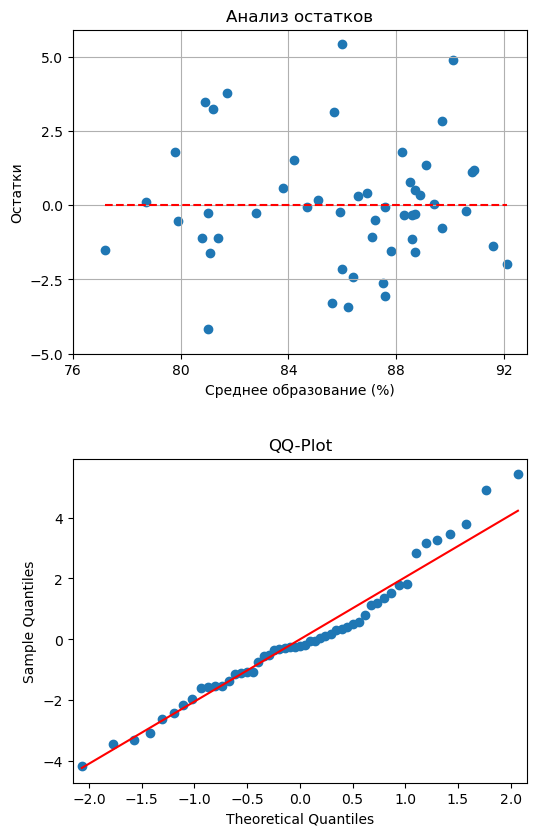

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.api as sma

# получаем данные и вычисляем коэффициэнты регрессионной модели
data=pd.read_csv('states.csv', sep=',')
intercept, slope = sm.ols(formula="poverty ~ hs_grad", data=data).fit().params
X = data['hs_grad']
Y = data['poverty']

# вычисляем остатки - на сколько Y далека от теоретической модели
residuals = Y - intercept - slope*X
x1=np.linspace(min(X),max(X),len(X))

# создаем графики
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 9))
# scatter plot
ax1.scatter(X,residuals)
ax1.plot(x1,[0]*len(x1),'--r')
# Q-Q plot
sma.qqplot(residuals, line='s', ax = ax2)

ax1.grid()
ax1.set_title('Анализ остатков')
ax1.set_xlabel('Среднее образование (%)')
ax1.set_ylabel('Остатки')
ax1.set_xticks(np.arange(76,93, step=4))
ax1.set_yticks(np.arange(-5,6, step=2.5))

ax2.set_title('QQ-Plot')

fig.tight_layout(pad=3.0)
plt.show()